# Predicting Company Bankruptcy using Machine Learning

## Table of Contents
* [Chapter 1: Project Overview](#chapter1)
    * [1.1 Project Motivation](#section1_1)
    * [1.2 Dataset Description](#section1_2)
    * [1.3 Methodologies](#section1_3)
* [Chapter 2: Data Preparation](#chapter2)
    * [2.1 Data Collection](#section2_1)
    * [2.2 Data Exploration (EDA)](#section2_2)
    * [2.3 Data Pre-Processing](#section2_3)
* [Chapter 3: Modelling](#chapter3)
    * [3.1 Evaluation Metrics](#section3_1)
    * [3.2 Machine Learning Models](#section3_2)
    * [3.3 Modelling Evaluations](#section3_3)
* [Chapter 4: Results](#chapter4)

## Chapter 1: Project Overview <a id="chapter1"></a>

### 1.1 Problem Statement <a id="section1_1"></a>
This project aims to develop a robust predictive model for company bankruptcy using various financial indicators, which allow stakeholders to make informed decisions in times of crisis.

### 1.2 Datasource <a class="anchor" id="section1_2"></a>
The dataset contains information about financial indicators leading to bankruptcy prediction of Polish companies.

- Dataset Source: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data)
- Contains 495 (rows of) bankrupted companies and 10008 (rows of) operational companies at the end of the 3-year forecasting period.

### Importing required libraries

In [2]:
import sys
import requests
import zipfile
import os
from scipy.io import arff

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Chapter 2: Data Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Data Extraction <a class="anchor" id="section2_1"></a>

In [3]:
source_url = (
    "https://archive.ics.uci.edu/static/public/365/polish+companies+bankruptcy+data.zip"
)
data_folder_path = "data"
dest_url = "data/downloaded_file.zip"

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


class GetZipFile(BaseEstimator, TransformerMixin):

    def fit(self, X):
        return self
    
    def transform(self, X):
        response = requests.get(source_url)
        with open(dest_url, "wb") as zipfile:
            zipfile.write(response.content)
        return X


class SaveFile(BaseEstimator, TransformerMixin):

    def fit(self, X):
        return self
    
    @staticmethod
    def extract_arff_from_zip(zip_path, arff_filename, extraction_path="."):
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extract(arff_filename, path=data_folder_path)
            return os.path.join(data_folder_path, arff_filename) 
        
    @staticmethod
    def convert_arff_to_csv(arff_path, csv_path):
        data, _ = arff.loadarff(arff_path)
        df = pd.DataFrame(data)
        for col in df.select_dtypes([object]):
            if isinstance(df[col][0], bytes):
                df[col] = df[col].apply(lambda x: x.decode("utf-8"))
        df.to_csv(csv_path, index=False)

    def transform(self, X):
        for i in range(1, 6):
            arff_filename = f"{i}year.arff"
            csv_path0 = f"{i}year.csv"
            extracted_arff_path = self.extract_arff_from_zip(dest_url, arff_filename)

            csv_path = os.path.join(data_folder_path, csv_path0)
            self.convert_arff_to_csv(extracted_arff_path, csv_path)
        return self

In [5]:
DataExtractionPipeline = Pipeline([
    ('get_zip_file', GetZipFile()),
    ('save_file', SaveFile())
])

#DataExtractionPipeline.fit_transform((source_url, dest_url))

### Dataset information
We chose to use only the 3rd year's dataset - because it has the least number of NULL values.

In [6]:
df = pd.read_csv("data/3year.csv")
df_origin = df.copy()

Rename the column headings and turn target column to discrete, for ease of data checks and data visualisation.

In [ ]:
columns = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / (cost of products sold)",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs /total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities *365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "class (target column)"
]

df.columns = columns

In [ ]:
class AsDiscrete(BaseEstimator, TransformerMixin):

    def fit(self, df):
        return self
    
    def transform(self, df):
        ncol = len(df.columns) - 1
        feature_space = df.iloc[:, 0:ncol]
        target_column = df.iloc[:, ncol]

        n = len(target_column)
        new_col = [0] * n
        for i in range(n):
            if target_column[i] == "b'0'":
                new_col[i] = 0
            else:
                new_col[i] = 1

        pd_col = pd.DataFrame(new_col, columns=['Target'])
        new_df = pd.concat([feature_space, pd_col], axis=1)

        new_df['Target'] =  new_df['Target'].astype('category')

        return new_df

In [ ]:
AsDiscretePipeline = Pipeline([
    ('toDiscrete', AsDiscrete()),
])

df = AsDiscretePipeline.fit_transform(df)
df.info()

Shape of the dataset

In [7]:
# Overview of the dataset
df.shape

(10503, 65)

View of dataset

In [8]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class (target column)
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


Dataset information summary:
-  10503 rows and 65 columns  
-  Target column: 
    -  bankrupt -> 1
    -  not-bankrupt -> 0 

Variables:  
X1 net profit / total assets  
X2 total liabilities / total assets  
X3 working capital / total assets  
X4 current assets / short-term liabilities  
X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365  
X6 retained earnings / total assets  
X7 EBIT / total assets  
X8 book value of equity / total liabilities  
X9 sales / total assets  
X10 equity / total assets  
X11 (gross profit + extraordinary items + financial expenses) / total assets  
X12 gross profit / short-term liabilities  
X13 (gross profit + depreciation) / sales  
X14 (gross profit + interest) / total assets   
X15 (total liabilities * 365) / (gross profit + depreciation)   
X16 (gross profit + depreciation) / total liabilities   
X17 total assets / total liabilities   
X18 gross profit / total assets   
X19 gross profit / sales   
X20 (inventory * 365) / sales   
X21 sales (n) / sales (n-1)  
X22 profit on operating activities / total assets  
X23 net profit / sales  
X24 gross profit (in 3 years) / total assets  
X25 (equity - share capital) / total assets  
X26 (net profit + depreciation) / total liabilities  
X27 profit on operating activities / financial expenses  
X28 working capital / fixed assets  
X29 logarithm of total assets  
X30 (total liabilities - cash) / sales  
X31 (gross profit + interest) / sales  
X32 (current liabilities * 365) / cost of products sold  
X33 operating expenses / short-term liabilities  
X34 operating expenses / total liabilities  
X35 profit on sales / total assets  
X36 total sales / total assets  
X37 (current assets - inventories) / long-term liabilities  
X38 constant capital / total assets  
X39 profit on sales / sales  
X40 (current assets - inventory - receivables) / short-term liabilities  
X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))  
X42 profit on operating activities / sales  
X43 rotation receivables + inventory turnover in days  
X44 (receivables * 365) / sales  
X45 net profit / inventory  
X46 (current assets - inventory) / short-term liabilities   
X47 (inventory * 365) / cost of products sold  
X48 EBITDA (profit on operating activities - depreciation) / total assets  
X49 EBITDA (profit on operating activities - depreciation) / sales  
X50 current assets / total liabilities  
X51 short-term liabilities / total assets  
X52 (short-term liabilities * 365) / (cost of products sold)  
X53 equity / fixed assets  
X54 constant capital / fixed assets  
X55 working capital  
X56 (sales - cost of products sold) / sales  
X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  
X58 total costs /total sales  
X59 long-term liabilities / equity  
X60 sales / inventory X61 sales / receivables  
X62 (short-term liabilities *365) / sales  
X63 sales / short-term liabilities  
X64 sales / fixed assets  
class (target column)  

### Data Checks
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values for each column
- Check statistics of dataset
- Check various categories present in the different categorical column 

#### 3.1 Check missing values

Number of missing values in each attribute

In [11]:
pd.set_option('display.max_rows', 8)
df.isna().sum()

net profit / total assets                    0
total liabilities / total assets             0
working capital / total assets               0
current assets / short-term liabilities     18
                                          ... 
(short-term liabilities *365) / sales       43
sales / short-term liabilities              18
sales / fixed assets                       228
Target                                       0
Length: 65, dtype: int64

Number of rows with at least one missing value

In [12]:
sum(df.apply(lambda row: sum(row.isna().values), axis=1)> 0)


5618

### 3.2 Check Duplicates

In [13]:
df.duplicated().sum()

87

There are 87 duplicate rows

### 3.3 Check data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column                                                                                                               Non-Null Count  Dtype   
---  ------                                                                                                               --------------  -----   
 0   net profit / total assets                                                                                            10503 non-null  float64 
 1   total liabilities / total assets                                                                                     10503 non-null  float64 
 2   working capital / total assets                                                                                       10503 non-null  float64 
 3   current assets / short-term liabilities                                                                              10485 non-null  float64 
 4   [(ca

### 3.4 Check number of unique values of each column




In [15]:
df.nunique()

net profit / total assets                  9948
total liabilities / total assets           9806
working capital / total assets             9947
current assets / short-term liabilities    9425
                                           ... 
(short-term liabilities *365) / sales      9688
sales / short-term liabilities             9767
sales / fixed assets                       9635
Target                                        1
Length: 65, dtype: int64

### 3.5 Check statistics of dataset

In [16]:
df.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


Insight

- 

### 2.2 Data Exploration (EDA) <a class="anchor" id="section2_2"></a>

#### 2.2.1 Visualization <a id="section2_2_1"></a> 

In this stage, we examined the feature columns and their data types to gain a comprehensive understanding of the dataset, including its size, structure, and characteristics. By visualizing the data through various plots and charts, data exploration enables the detection of patterns, trends, and relationships between different variables. This can provide valuable insights into the underlying relationships within the data.

We use histograms, box plots, and density plots to visually explore the distribution of each feature. By using scatter plots and heat maps, we explore the correlation and relationship within each pair of features to ease the feature selection process.

Exploring the data allows for the assessment of data quality, including issues such as data inconsistencies, errors, or biases. This ensures that the data used for analysis is reliable and representative of the underlying phenomena.



In [17]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# mute warning messages
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# make a copy of the datasets for visualization
df_graph = df.copy()

##### Missingness Map
We first plot a missingness map to see the sparsity of our dataset.

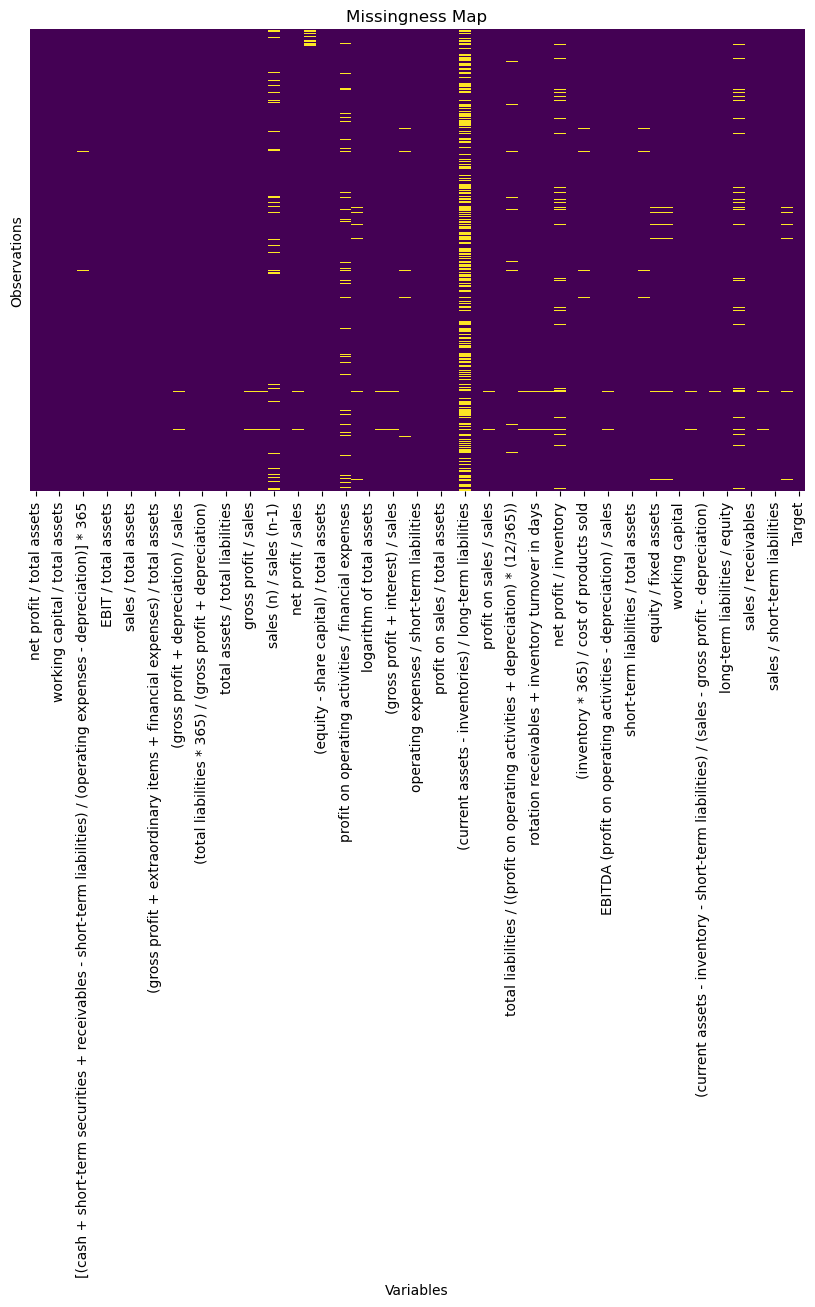

In [18]:
# Create a missingness matrix
missing_values = df_graph.isnull()

# Plot the missingness map
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap="viridis", cbar=False)
plt.title("Missingness Map")
plt.xlabel("Variables")
plt.ylabel("Observations")
plt.yticks([])
plt.show()

In [19]:
# Find the number of null values in each column
null_counts = df_graph.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Calculate the threshold for more than 40% of the entries to be null
threshold = df_graph.shape[0] * 0.4

# Use boolean indexing to filter columns where the number of null values exceeds the threshold
columns_with_many_nulls = df_graph.columns[df_graph.isnull().sum() > threshold]

print("Columns where more than 40% of the entries are null:")
print(columns_with_many_nulls)

Number of null values in each column:
net profit / total assets                    0
total liabilities / total assets             0
working capital / total assets               0
current assets / short-term liabilities     18
                                          ... 
(short-term liabilities *365) / sales       43
sales / short-term liabilities              18
sales / fixed assets                       228
Target                                       0
Length: 65, dtype: int64
Columns where more than 40% of the entries are null:
Index(['(current assets - inventories) / long-term liabilities'], dtype='object')


##### Histogram
The second step of our exploratory data analysis is to use histograms to study the distrbutions of each feature column as well as the target column. From the result (single or two high bars), we found that almost all features have far outliers.

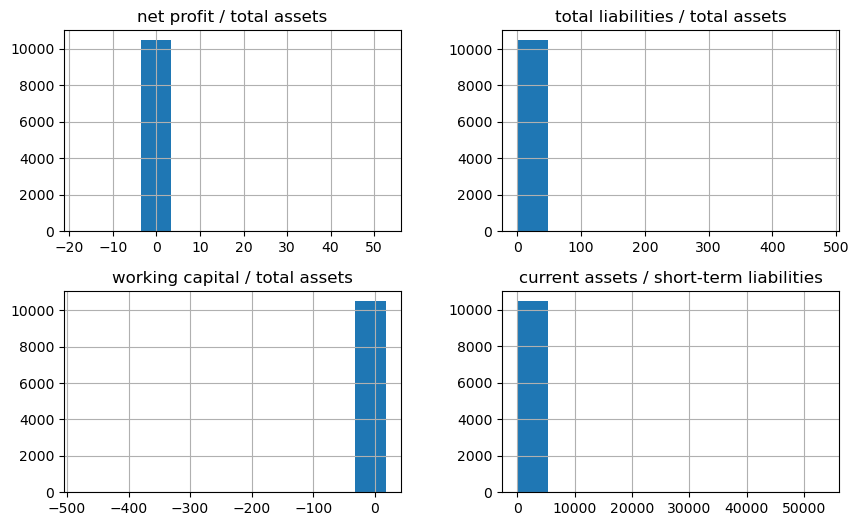

In [20]:
# Here we illustrate the histogram distribution for the first 10 features
df_graph.iloc[:, 0:4].hist(figsize=(10, 6))  # figsize is optional, adjust as needed
plt.show()

##### Boxplot

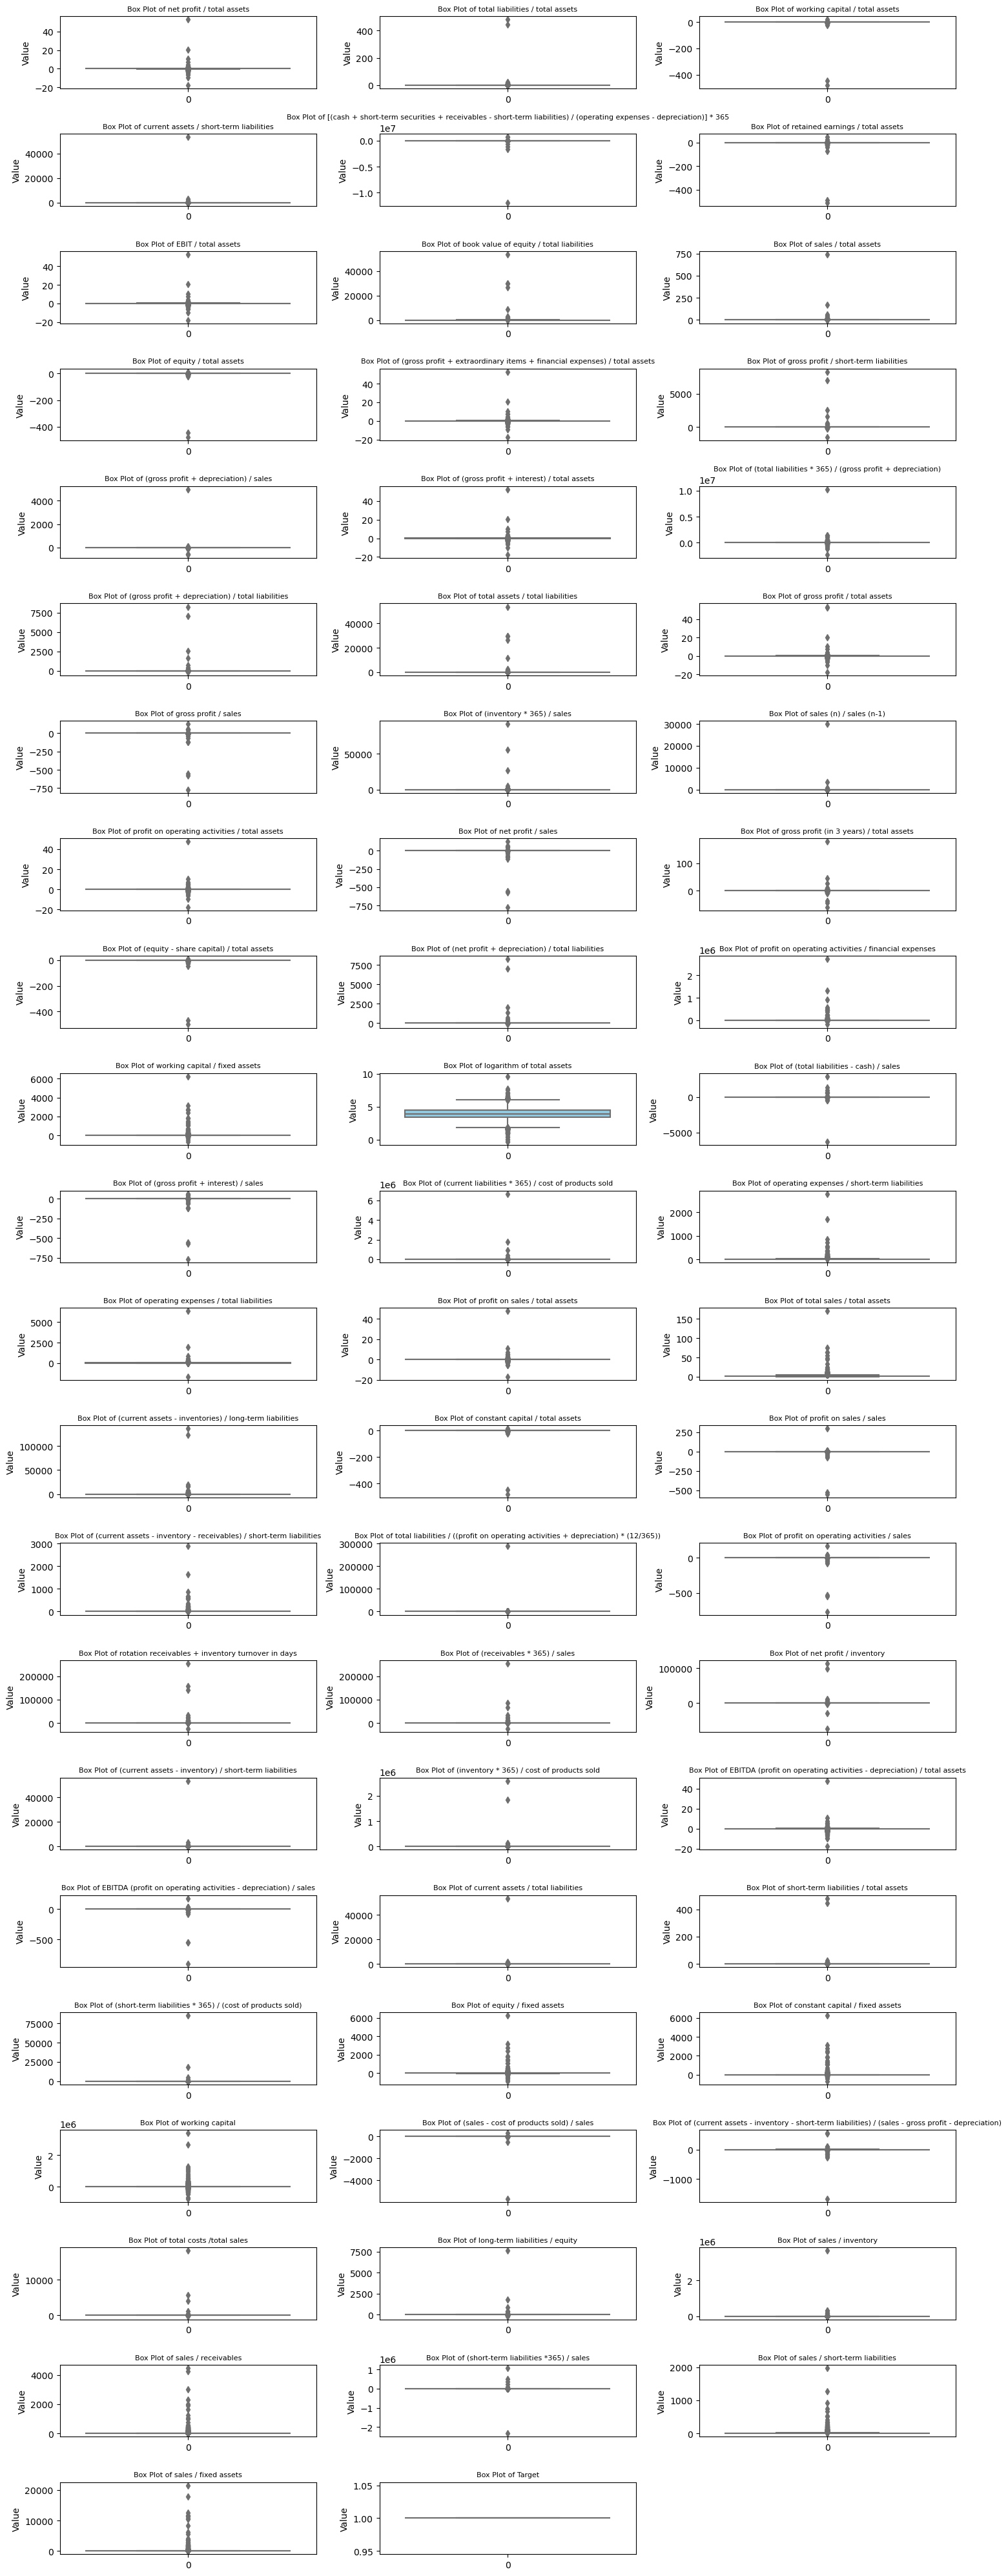

In [21]:
plt.figure(figsize=(15, 40))
i = 1
for column in df_graph.columns:
    plt.subplot(22, 3, i)  # Adjust layout as needed
    i += 1
    sns.boxplot(data=df_graph[column], color="skyblue")
    plt.title(f"Box Plot of {column}", fontsize=8)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

#### 2.2.2 Detection of Outliers<a id="section2_2_2"></a>
In the realm of data analysis, outliers represent data points that stray considerably from the general pattern observed in a dataset. These outliers possess the potential to heavily influence the performance of models employed in analysis. Through thorough exploration of the data, outliers can be pinpointed, allowing for informed decisions on how to address them, whether by removal or transformation, to minimize their impact on the overall analysis.

Upon examining the visualizations provided above, it becomes apparent that the majority of features exhibit a notable presence of outliers. Consequentlywetapproached to o remove these outliers, aiming to achieve clearered understanding of the underlying distribution of these features.

##### Outlier Removal

In [22]:
# Define a function to remove outliers based on 1.5 * IQR for each feature
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]


# Remove outliers for each feature and plot histograms
clean_list = []
for column in df_graph.columns:
    cleaned_data = remove_outliers(df_graph[column])
    clean_list.append(cleaned_data)

AssertionError: 

Below are the visualizations based on the outliers removed data set.

##### Histogram (After Outlier Removal)

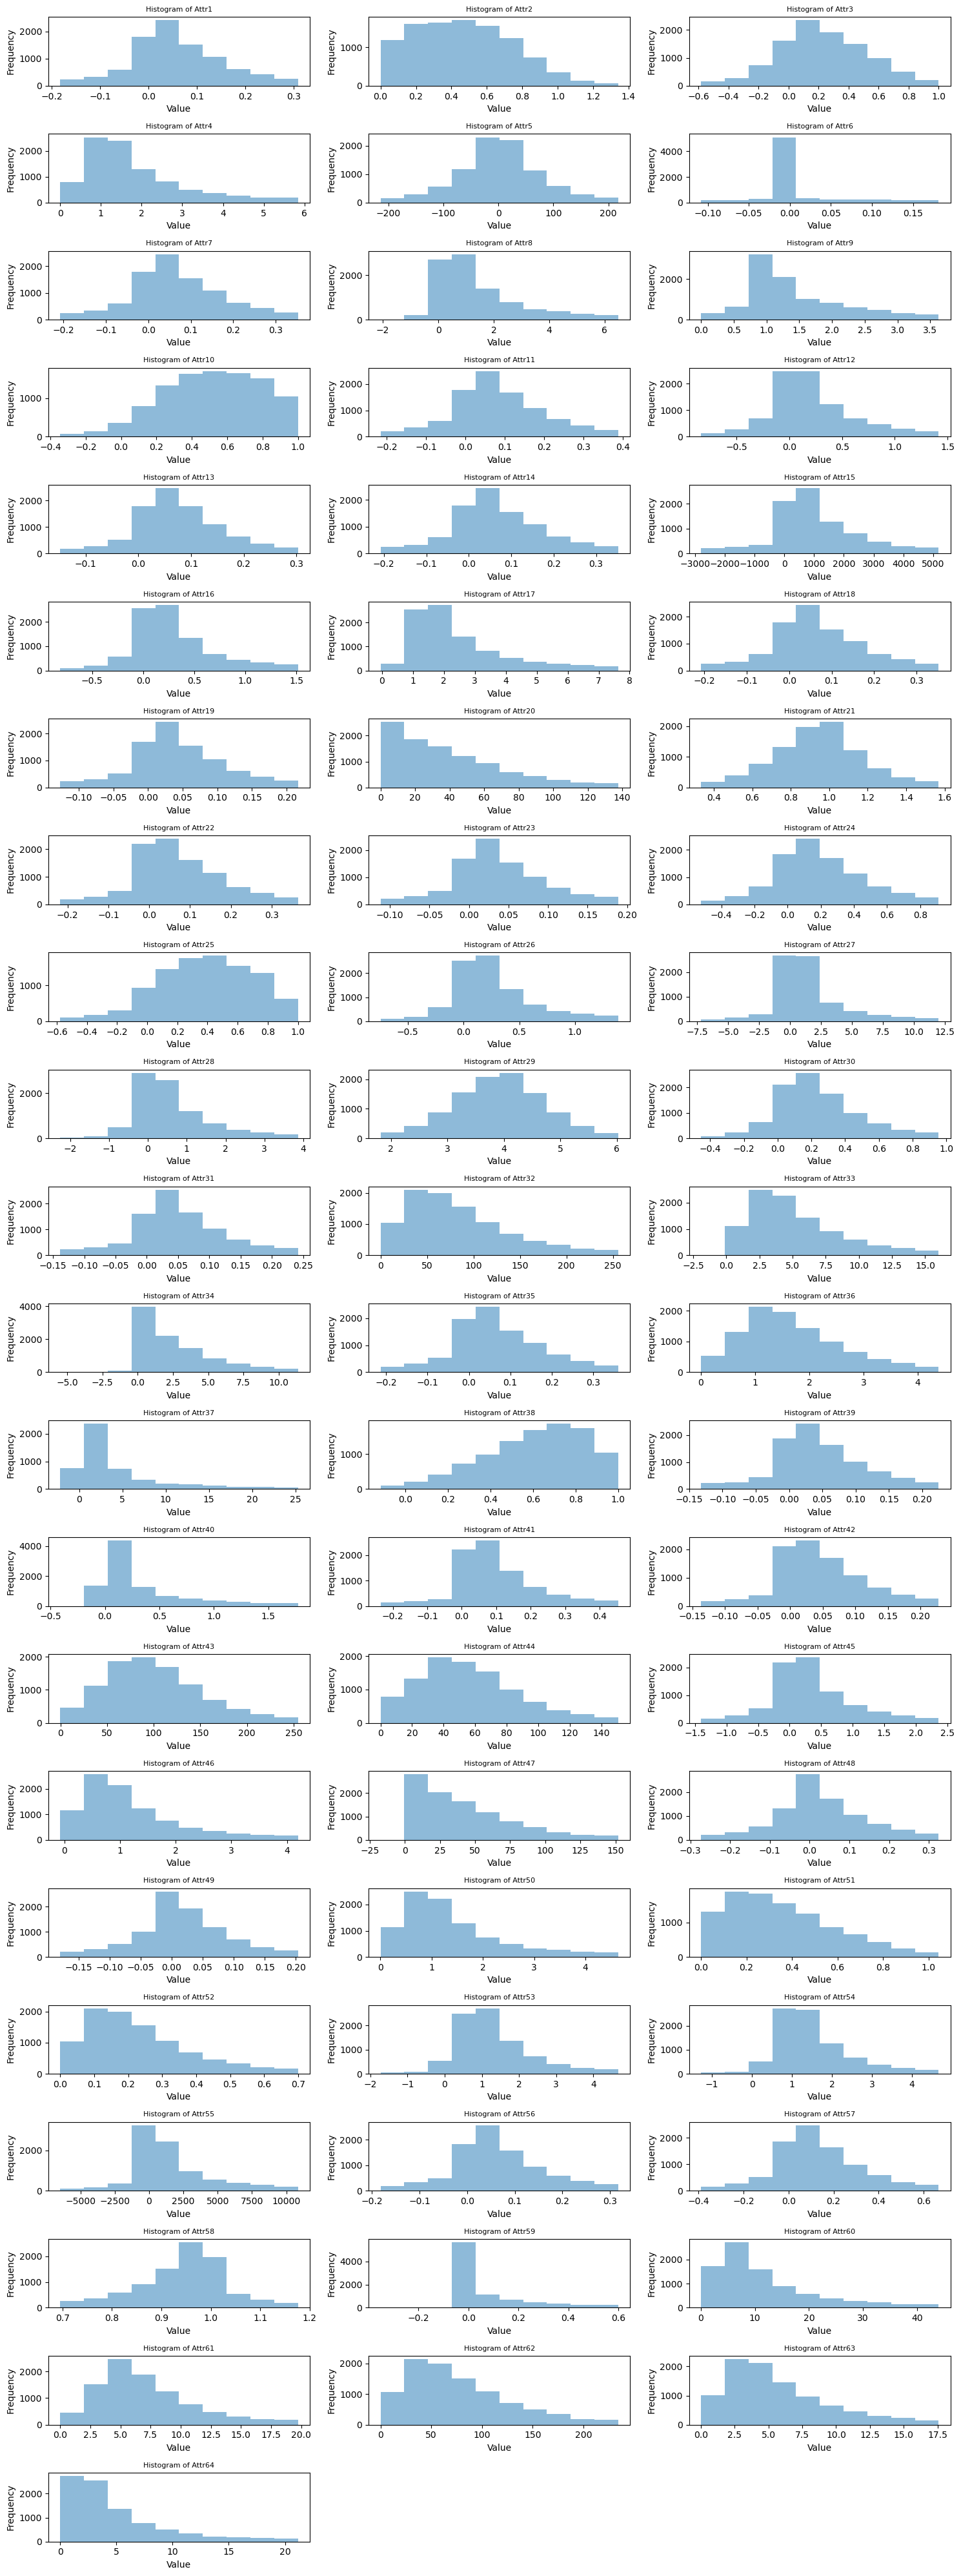

In [ ]:
plt.figure(figsize=(15, 40))
for i, series in enumerate(clean_list[: len(clean_list) - 1], start=1):
    plt.subplot(22, 3, i)  # Adjust layout as needed
    plt.hist(series, bins=10, alpha=0.5)
    plt.title(f"Histogram of {series.name}", fontsize=8)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### Density plots (After Outlier Removal)

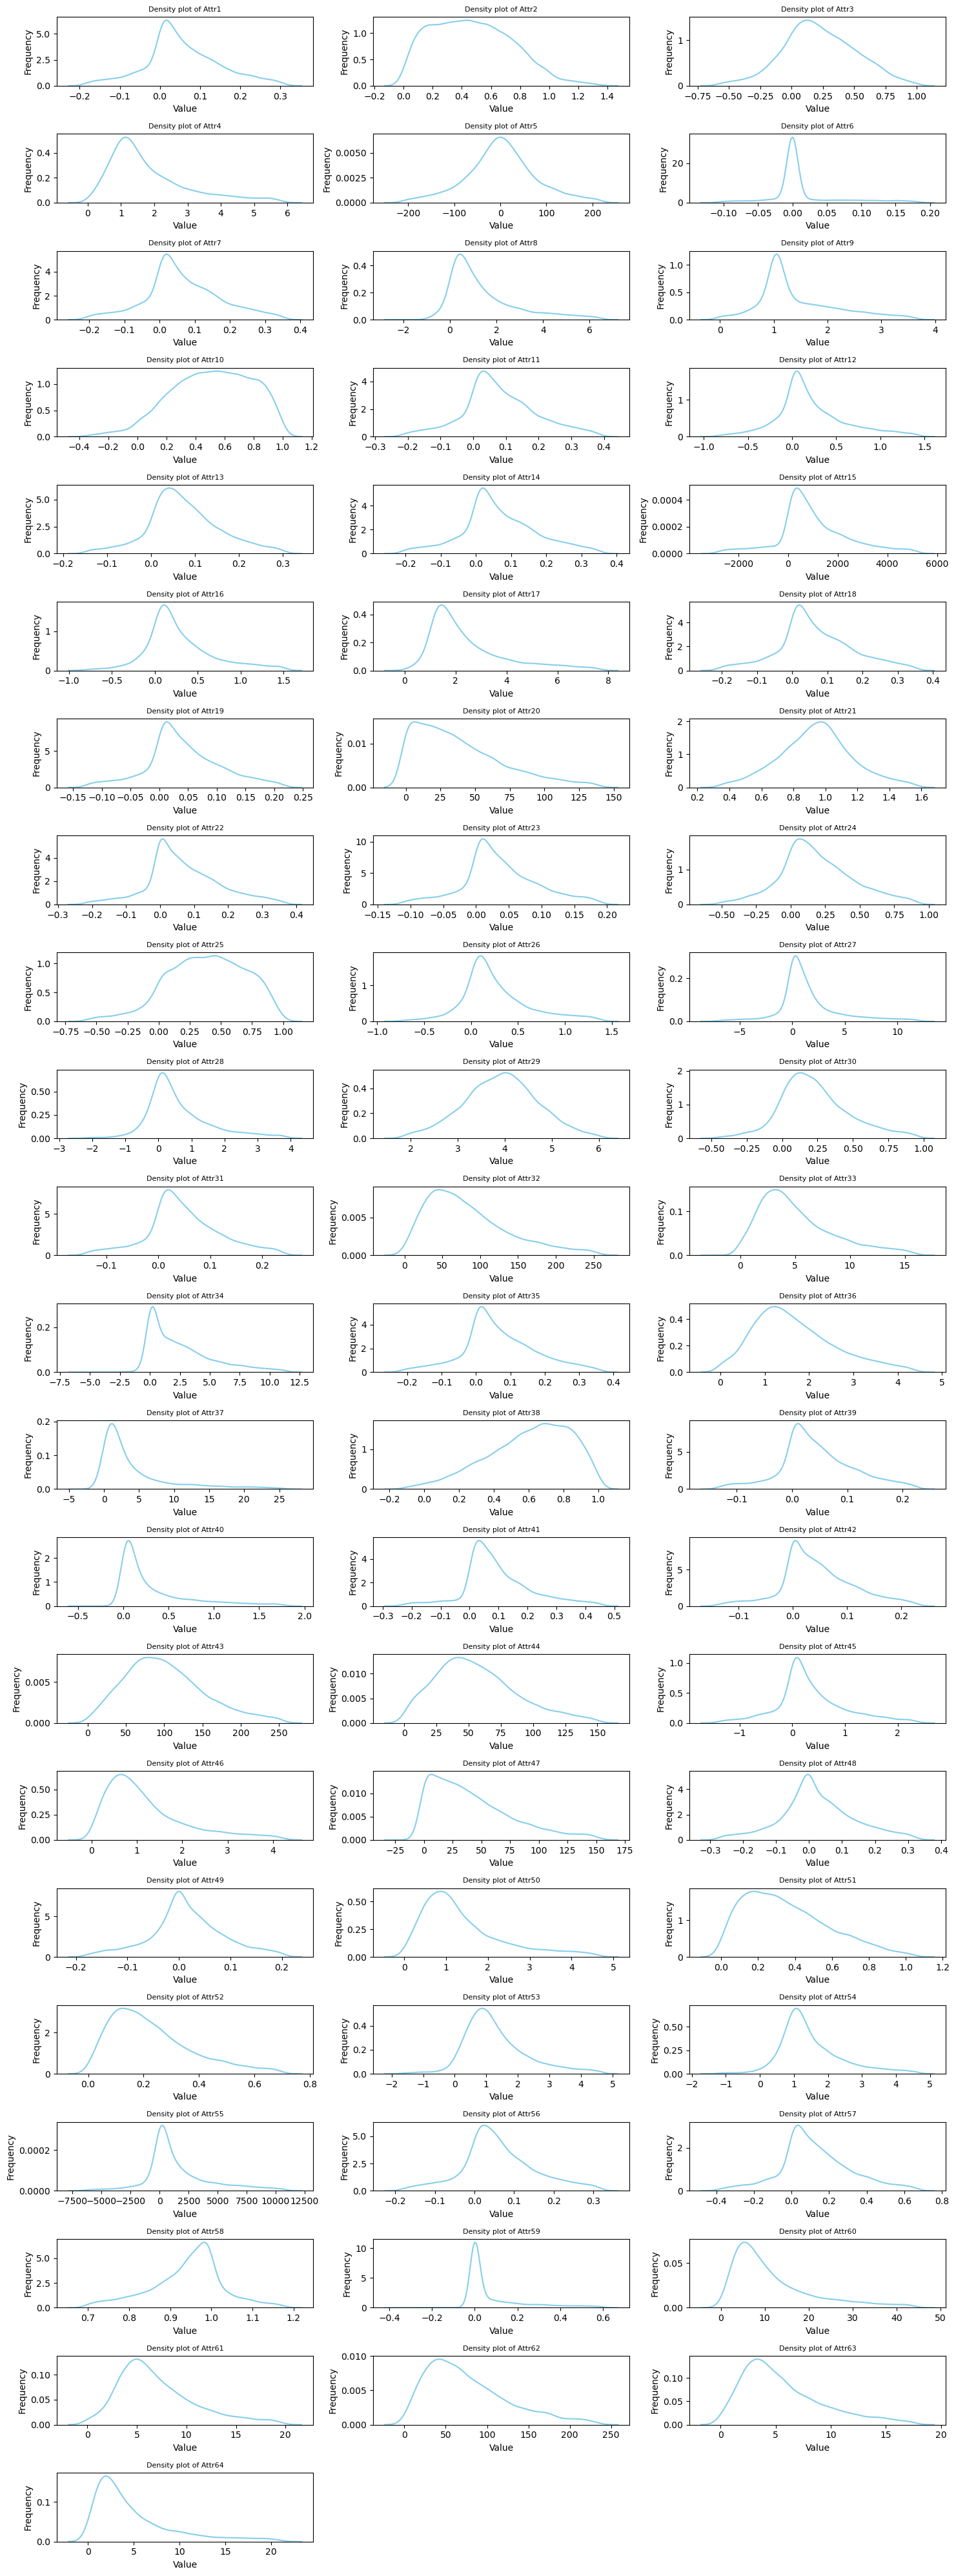

In [ ]:
import warnings

warn_singular = False
plt.figure(figsize=(15, 40))
for i, series in enumerate(clean_list[: len(clean_list) - 1], start=1):
    plt.subplot(22, 3, i)  # Adjust layout as needed
    sns.kdeplot(series, color="skyblue")
    plt.title(f"Density plot of {series.name}", fontsize=8)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### Box plots

KeyError: 0

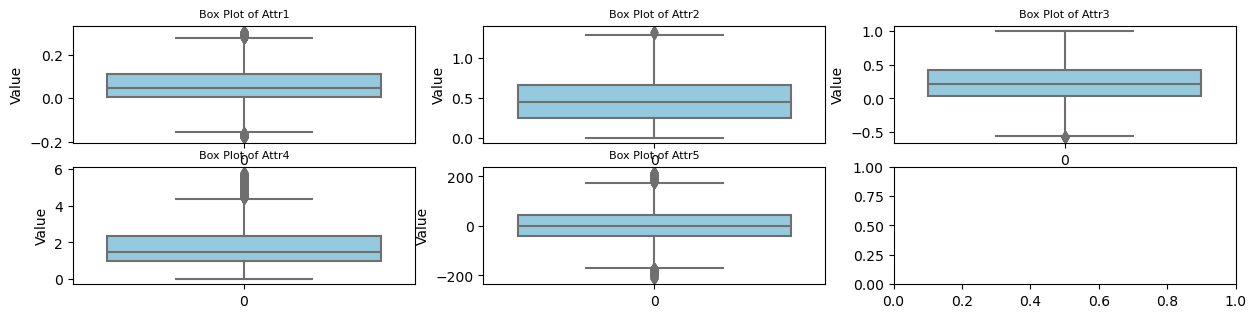

In [ ]:
plt.figure(figsize=(15, 40))
for i, series in enumerate(clean_list[: len(clean_list) - 1], start=1):
    plt.subplot(22, 3, i)  # Adjust layout as needed
    sns.boxplot(data=series, color="skyblue")
    plt.title(f"Box Plot of {series.name}", fontsize=8)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

After removing the outliers, it becomes apparent that the majority of features exhibit smoother distributions. Nonetheless, due to the substantial presence of outliers, we have opted against their removal in subsequent data processing steps to prevent information loss.




### 2.3 Data Pre-Processing <a class="anchor" id="section2_3"></a>

In this section, we prepare our dataset by performing data pre-processing. Raw data often contains inconsistencies, missing values, and outliers that can negatively impact the performance of machine learning models. Data pre-processing ensures the data is clean, consistent, and formatted appropriately for our modelling tasks.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

The function below splits the feature space and the target column.

In [ ]:
# function to separate features and target
def get_Xy(df):
    X = df.iloc[:, 0 : len(df.columns) - 1]
    y = df.iloc[:, -1]
    return X, y

From EDA, it is observed that there are many missing values in the dataset. We removed the column with more than 40% values missing as it is a significant loss of information. Rows with more than half of the values missing are also removed. For the remaining missing values, median imputation is used in view of the presence of drastic outliers in the dataset. 

In [ ]:
# function to handle missing values
def med_impute(df, y):
    # remove columns with more than 40% values being null
    thd1 = df.shape[0] * 0.4
    cols = df.columns[df.isnull().sum() < thd1]
    df = df[cols]

    # remove rows with more than 50% values being null
    thd2 = df.shape[1] * 0.5
    y = y[df.isnull().sum(axis=1) <= thd2]
    df = df[df.isnull().sum(axis=1) <= thd2]

    # median imputation for null values
    df = df.fillna(df.median())

    return df, y

The function is to normalise numerical columns to remove effect of inconsistent scales between feature columns.

In [ ]:
def normalise(df):
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return X_scaled

The function is to drop columns that are of strong correlation with one or more other feature column(s) to remove the adverse effect of multicollinearity on subsequent classification result. 

In [ ]:
# function for feature selection
def drop_high_corr(df, threshold=0.7):
    correlation_matrix = df.corr()
    high_cor = []
    dropped_features = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                if correlation_matrix.columns[j] != correlation_matrix.columns[i]:
                    high_cor.append(
                        [
                            correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j],
                        ]
                    )

    for pair in high_cor:
        feature1, feature2, correlation = pair
        if feature1 not in dropped_features and feature2 not in dropped_features:
            if feature2 in df.columns:
                df.drop(feature2, axis=1, inplace=True)
                dropped_features.append(feature2)
            else:
                print("Feature '" + feature2 + "' not found in the DataFrame.")
    return df

In [ ]:
def process0(df):
    X, y = get_Xy(df)
    X_imputed, y = med_impute(X, y)
    X_scaled_df = normalise(X_imputed)
    return X_scaled_df, y


# function to pre-process the data
def process1(df):
    X, y = get_Xy(df)
    X_imputed, y = med_impute(X, y)
    X_scaled_df = normalise(X_imputed)
    return drop_high_corr(X_scaled_df), y


# function to obtain train and test sets
def process2(df):
    X, y = process1(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=3244
    )

    return X_train, X_test, y_train, y_test


# function to obtain train and test sets with sythesised instances of the minority class
def pre_process(df):
    X, y = process1(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=3244
    )
    smote = SMOTE(random_state=3244)
    X_smote, y_train = smote.fit_resample(X_train, y_train)

    return X_smote, X_test, y_train, y_test

### 2.3.1 ANOVA test for feature selection
We will also perform feature selection for our dataset, because irrelavant features can:
- **Increase Model Complexity**: Unnecessary features can lead to overfitting, where the model performs well on training data but poorly on unseen data.
- **Reduce Model Interpretability**: A large number of features makes it difficult to understand how the model arrives at its predictions.
- **Slow Down Training Time**: Training models with irrelevant features takes longer and consumes more computational resources.

One method of feature selection is ANOVA test, defined in: `get_df_with_top_k_features` and `find_best_k_features_from_ANOVA`

**ANOVA (Analysis of Variance)** is a statistical test used in feature selection to identify features that have a significant influence on the target variable. Here's how it helps select the best k features (where k is a chosen number):

- Focuses on Variance: ANOVA analyses the variation in a feature's values. It compares the variation between groups (bankrupt vs. non-bankrupt) to the variation within each group.
- Low p-value indicates Impact: Features with a low p-value (from the F-statistic) suggest a strong statistical difference in the feature's values between bankrupt and non-bankrupt companies. This implies the feature likely has a real impact on predicting bankruptcy.

In [ ]:
def plot_ANOVA_test_graph(train_acc_dict, test_acc_dict):
    # Extract keys and values from train_acc_dict and test_acc_dict
    train_k_values, train_accuracy_values = zip(*train_acc_dict.items())
    test_k_values, test_accuracy_values = zip(*test_acc_dict.items())

    plt.figure(figsize=(6, 4))
    # Plot train accuracy
    plt.plot(
        train_k_values, train_accuracy_values, label="Train Accuracy", color="blue"
    )
    # Plot test accuracy
    plt.plot(test_k_values, test_accuracy_values, label="Test Accuracy", color="green")

    # Find k values corresponding to maximum accuracies
    best_train_k = max(train_acc_dict, key=train_acc_dict.get)
    best_test_k = max(test_acc_dict, key=test_acc_dict.get)
    best_train_accuracy = train_acc_dict[best_train_k]
    best_test_accuracy = test_acc_dict[best_test_k]

    # Annotate the point corresponding to the peak train accuracy
    plt.annotate(
        f"Max Train Accuracy\nk={best_train_k}, Acc={best_train_accuracy:.2f}",
        xy=(best_train_k, best_train_accuracy),
        xytext=(-30, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", color="blue"),
    )

    # Annotate the point corresponding to the peak test accuracy
    plt.annotate(
        f"Max Test Accuracy\nk={best_test_k}, Acc={best_test_accuracy:.2f}",
        xy=(best_test_k, best_test_accuracy),
        xytext=(30, -30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", color="green"),
    )

    # Label axes and add title
    plt.xlabel("Number of Features (k)")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. Number of Features from ANOVA test")

    plt.legend()
    plt.show()


## Note: *args follow the convention X_train, X_test, y_train, y_test
def get_df_with_top_k_features(k_features, *args):  # after pre_process(df)
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # define feature selection
    fs = SelectKBest(score_func=f_classif, k=k_features)

    # apply feature selection
    fs.fit_transform(X_train, y_train)

    # Take the features with the highest F-scores
    fs_scores_array = np.array(fs.scores_)

    # Get the indices that would sort the array in descending order
    sorted_indices_desc = np.argsort(fs_scores_array)[::-1]

    # Take the top k indices
    top_indices = sorted_indices_desc[:k_features]

    selected_columns_X_train = X_train.iloc[:, top_indices]
    selected_columns_X_test = X_test.iloc[:, top_indices]

    return selected_columns_X_train, selected_columns_X_test, y_train, y_test


def find_best_k_features_from_ANOVA(model, *args):

    X_train = args[0]
    original_n_features = len(X_train.columns)

    train_acc_dict = {}  # 0 is a dummy accuracy for k=0 features
    test_acc_dict = {}
    train_test_dataset = {}

    for k in range(1, original_n_features + 1):
        print(f"k: {k}")
        train_test_dataset_after_ANOVA = get_df_with_top_k_features(k, *args)
        train_accuracy, test_accuracy = model(*train_test_dataset_after_ANOVA)
        train_test_dataset[k] = train_test_dataset_after_ANOVA
        train_acc_dict[k] = train_accuracy
        test_acc_dict[k] = test_accuracy

    # Find k that gives the highest accuracy
    best_train_k = max(train_acc_dict, key=train_acc_dict.get)
    best_test_k = max(test_acc_dict, key=test_acc_dict.get)

    print(f"\033[96mBest k for train_accuracy:\033[00m {best_train_k}")
    print(f"\033[96mBest k for test_accuracy:\033[00m {best_test_k}")

    plot_ANOVA_test_graph(train_acc_dict, test_acc_dict)

    return train_test_dataset[best_test_k]

Moving forward, we can use ANOVA test for feature selection to reduce the number of features in our dataset before building our model.

<AxesSubplot: >

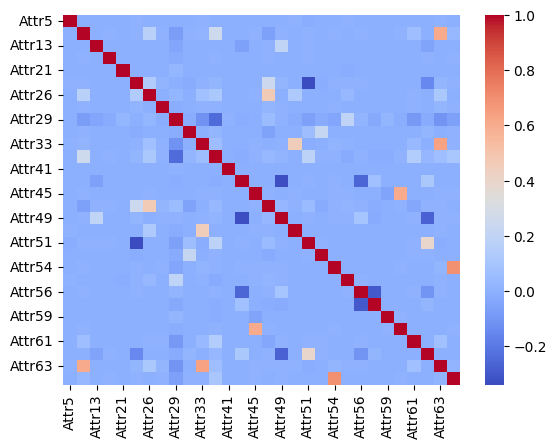

In [ ]:
# We use the pre-processing function 'process1' to get the feature space where no feature pair has a correlation value higher than 0.7.
X_heatmap, y_heatmap = process1(df_graph)
sns.heatmap(X_heatmap.corr(), annot=False, cmap="coolwarm")

### 2.3.2 Filter Method for Feature Selection

Filter method is a feature selection method in the preprocessing step, and it is independent of the machine learning algorithm deployed afterwards. In our case, we implemented two filtering method, based on Information Gain (IG) and Correlation respectively.

1. **Information Gain (IG)**: This method measures the reduction in entropy from transforming a dataset in some way. It is often used in training decision trees. Information Gain can be applied to feature selection by evaluating the mutual information between each feature and the target variable. Features that have higher mutual information with the target variable are considered more informative and are thus selected.

2. **Correlation**: This is a statistical measure that describes the size and direction of a relationship between variables. In feature selection, we often look for features that have a high correlation with the target variable but are not highly correlated with each other, to avoid redundancy.

For both functions, we sort the features based on their scores in descending order. Higher scores indicate more important features.

For better judging the optimal number of feature, we define a function `plot_feature_performance` to evaluate the performance of a model (balaneced Random Forest as example) as we vary the number of top features used. Finally, it plots the performance metrics f1 and recall (explained in the next chapter) against the number of features. With the aid of the plot, we determine the point of diminishing return through elbow method, selecting the optimal number of features.


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score


def information_gain(X, y):
    mi_scores = mutual_info_classif(X, y, discrete_features="auto")
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def correlation_selection(X, y):
    if isinstance(y, pd.Series):
        y = y.to_frame(name="Target")
    elif isinstance(y, pd.DataFrame):
        y.columns = ["Target"]

    df_combined = pd.concat([X, y], axis=1)
    correlation_matrix = df_combined.corr()
    correlation_w_target = correlation_matrix["Target"].drop("Target")
    return correlation_w_target.abs().sort_values(ascending=False)


def plot_feature_performance(X, y, score_series, model, max_features=None):
    f1_results = []
    recall_results = []
    feature_counts = []

    if not max_features:
        max_features = len(score_series)

    for i in range(1, max_features + 1):
        top_features = score_series.nlargest(i).index
        X_selected = X[top_features]

        # Cross-validation F1 and recall scores
        f1 = cross_val_score(model, X_selected, y, cv=5, scoring="f1")
        recall = cross_val_score(model, X_selected, y, cv=5, scoring="recall")

        f1_results.append(f1.mean())
        recall_results.append(recall.mean())
        feature_counts.append(i)

    # Plotting the F1-score and recall results
    plt.figure(figsize=(10, 6))
    plt.plot(
        feature_counts,
        f1_results,
        marker="o",
        linestyle="-",
        markersize=8,
        label="F1 Score",
    )
    plt.plot(
        feature_counts,
        recall_results,
        marker="o",
        linestyle="-",
        markersize=8,
        label="Recall",
    )
    plt.xlabel("Number of Features")
    plt.ylabel("Score")
    plt.title("Model Performance vs. Number of Features")
    plt.legend()
    plt.grid(True)
    plt.show()

### 2.3.3 Wrapper Method for Feature Selection

The wrapper method for feature selection is a technique used to identify the most significant features for a predictive model. It works by starting with an empty set and adding features one by one, each time choosing the feature that, when added, most improves the model's F1 score - our desirable metric. This approach is iterative and selects features based on their contribution to the model's predictive accuracy.

In [ ]:
from sklearn.metrics import f1_score


def forward_feature_selection(model, X_train, y_train, X_test, y_test):
    selected_features = []
    best_f1 = 0
    features = list(X_train.columns)

    for _ in range(len(features)):
        f1_scores = []
        for feature in features:
            if feature not in selected_features:
                temp_features = selected_features + [feature]
                model.fit(X_train[temp_features], y_train)
                y_pred = model.predict(X_test[temp_features])
                f1 = f1_score(y_test, y_pred)
                f1_scores.append((feature, f1))

        # Find the best feature and its f1 score
        f1_scores.sort(key=lambda x: x[1], reverse=True)
        best_feature, best_feature_f1 = f1_scores[0]

        if best_feature_f1 > best_f1:
            print(f"Adding {best_feature} improved F1 to {best_feature_f1}")
            best_f1 = best_feature_f1
            selected_features.append(best_feature)
        else:
            break

    print("Selected features:", selected_features)
    return selected_features